# Análise de espectros

Neste notebook introduzimos a análise de espectros LIBS utilizando métodos de visualização científica. O primeiro passo é  definir umas funções que vamos utilizar à frente.

In [1]:
#importar as duas bibliotecas já introduzidas no passado
import matplotlib.pyplot as plt
plt.style.use('bmh')
import numpy as np

#importar outras bibliotecas necessárias para as funções que vamos definir
import requests
import re


def read_libs_data(filename):
  """
  Função usada para ler dados de ficheiros do LIBS fornecidos.
  Retorna wavelenghts, intensidades
  """
  data = np.loadtxt(filename)
  return data[:,0], data[:,1]/np.max(data[:,1])

def scrap_element(element):
  """
  Função usada para aceder a espectros de elementos da base de dados da NIST.
  Retorna wavelenghts, intensidades normalizadas
  """

  URL = "https://physics.nist.gov/cgi-bin/ASD/lines1.pl?composition="+element+"%3A100&mytext%5B%5D="+element+"&myperc%5B%5D=100&spectra="+element+"0-2&low_w=300&limits_type=0&upp_w=900&show_av=2&unit=1&resolution=2000&temp=1&eden=1e17&maxcharge=2&min_rel_int=0.01&libs=1"
  page = requests.get(URL)

  lista = page.text.split('var dataDopplerArray=')[1].split(';')[0].replace('],',']').replace('null','0').split('\n')[1:]
  x = []
  y = []
  for i in lista:
    x.append(float(i.replace('[','').replace(']','').split(",")[0]))
    y.append(float(i.replace('[','').replace(']','').split(",")[1]))

  return x,y/np.max(y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Primeiro para ler um espectro usaremos a função read_libs_data(filename), onde filename deve ser uma string com o nome do ficheiro que queremos ler. Facilmente podemos fazer o plot destes dados usando o matplotlib:

In [2]:
#ler um ficheiro com dados LIBS (um .txt com duas colunas, uma com os dados dos comprimentos de onda, outra com as contagens de intensidade)
wavelengths_rock_1, spectrum_rock_1 = read_libs_data('rock_1.txt')

#ler outro ficheiro
wavelengths_soil_1, spectrum_soil_1 = read_libs_data('soil_1.txt')

#plot dos dados
plt.subplots(figsize=[15,5])
plt.title("Spectrum Analysis of Rock Sample 1")
plt.plot(wavelengths_rock_1,spectrum_rock_1, color='k', label = 'Rock 1')

plt.subplots(figsize=[15,5])
plt.title("Spectrum Analysis of Soil Sample 1")
plt.plot(wavelengths_soil_1,spectrum_soil_1, color='blue', label = 'Soil 1')

OSError: ignored

O próximo passo é comparar com espectros esperados para cada elemento. Para fazermos isto vamos utilizar a base de dados da NIST. 

https://physics.nist.gov/PhysRefData/ASD/LIBS/libs-form.html

Foi definida uma função *scrap_element(element)* que acede a esta base de dados e retorna os comprimentos de onda e intensidades normalizadas esperados. Exemplos encontram-se definidos abaixo.


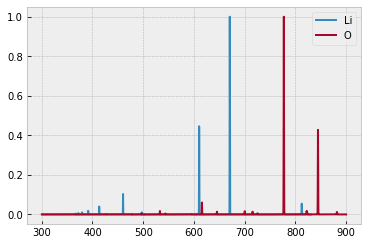

In [ ]:
#espectro do Lítio
element = "Li"
x,y = scrap_element(element)
plt.plot(x,y,label='Li')

#Espectro do Oxigénio
element = "O"
x,y = scrap_element(element)
plt.plot(x,y,label='O')

plt.legend()


Podemos agora utilizar a combinação das duas representações e sobrepor, tentando inferir se 

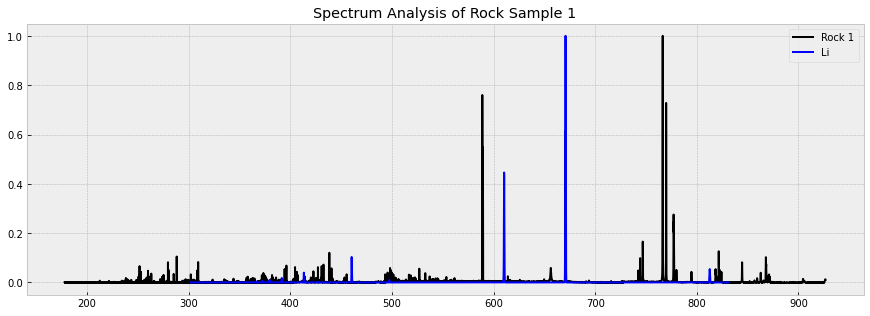

In [ ]:
#ler um ficheiro com dados LIBS (um .txt com duas colunas, uma com os dados dos comprimentos de onda, outra com as contagens de intensidade)
wavelengths_rock_1, spectrum_rock_1 = read_libs_data('rock_1.txt')

#espectro do Lítio
element = "Li"
x,y = scrap_element(element)

#plot dos dados
plt.subplots(figsize=[15,5])
plt.title("Spectrum Analysis of Rock Sample 1")
plt.plot(wavelengths_rock_1,spectrum_rock_1, color='k', label = 'Rock 1')
plt.plot(x,y,label='Li',color='b')
plt.legend()

Infelizmente, apesar de todas as vantagens, o Google collab não permite interagir com o gráfico, pelo que se torna complicado visualizar se realmente temos linhas de Lítio na amostra. Para ajudar neste processo vamos utilizar a função plt.xlim(min, max) que vai restringir a representação gráfica ao intervalo [min,max] de comprimentos de onda. Pela consulta da base de dados do NIST conseguimos inferir que existe uma linha por volta dos 670...

(660.0, 680.0)

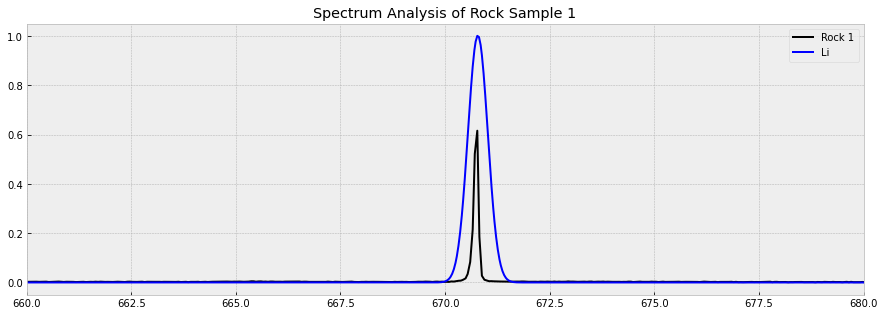

In [ ]:
#plot dos dados
plt.subplots(figsize=[15,5])
plt.title("Spectrum Analysis of Rock Sample 1")
plt.plot(wavelengths_rock_1,spectrum_rock_1, color='k', label = 'Rock 1')
plt.plot(x,y,label='Li',color='b')
plt.legend()
plt.xlim(660,680)

(600.0, 620.0)

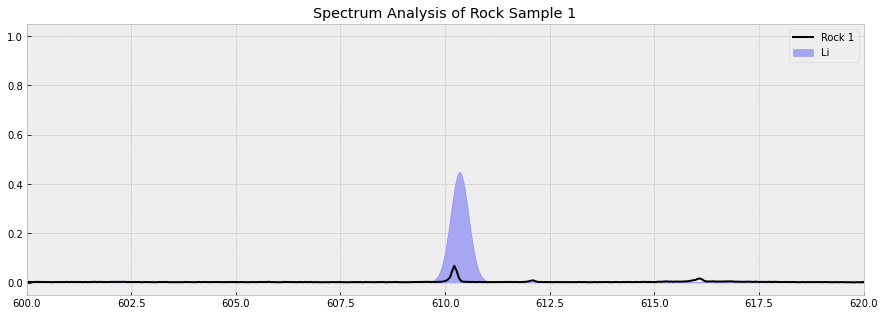

In [ ]:
#plot dos dados
plt.subplots(figsize=[15,5])
plt.title("Spectrum Analysis of Rock Sample 1")
plt.plot(wavelengths_rock_1,spectrum_rock_1, color='k', label = 'Rock 1')
plt.fill_between(x,y*0,y,label='Li',color='blue',alpha=0.3)
plt.legend()
plt.xlim(600,620)